<a href="https://colab.research.google.com/github/IbrahimBajwa313/Data-Science/blob/master/Multiple%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Multiple Linear Regression Lab

In [3]:
# 1. Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
sns.set()

In [4]:
np.random.seed(42)
n = 100

X1 = np.random.rand(n, 1) * 10       # Feature 1
X2 = np.random.rand(n, 1) * 5        # Feature 2
noise = np.random.randn(n, 1) * 2


In [5]:
# True relation: y = 3*X1 + 2*X2 + 5 + noise
y = 3 * X1 + 2 * X2 + 5 + noise


In [6]:
X = np.hstack([X1, X2])
df = pd.DataFrame(np.hstack([X, y]), columns=["X1", "X2", "y"])
print("First 5 rows of the synthetic dataset:")
display(df.head())


First 5 rows of the synthetic dataset:


,X1,X2,y
0,3.745401,0.157146,15.190446
1,9.507143,3.182052,40.350041
2,7.319939,1.571780,30.689523
3,5.986585,2.542853,26.616759
4,1.560186,4.537832,22.487773


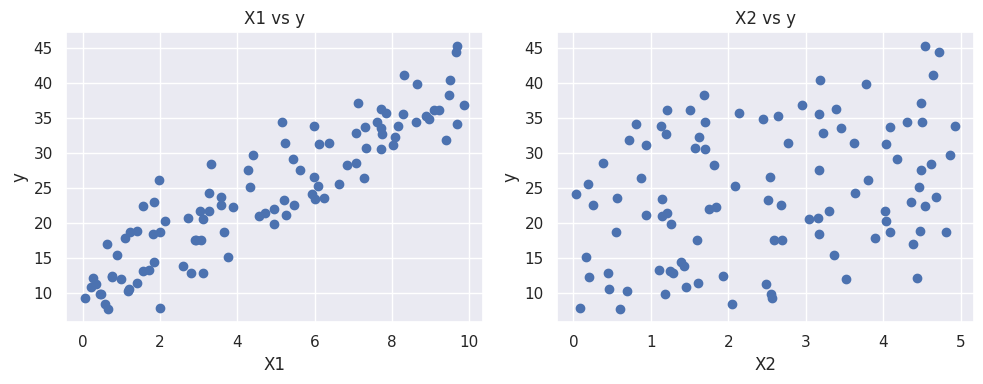

In [7]:
# Visualize features vs target
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X1, y)
plt.xlabel("X1"); plt.ylabel("y"); plt.title("X1 vs y")
plt.subplot(1,2,2)
plt.scatter(X2, y)
plt.xlabel("X2"); plt.ylabel("y"); plt.title("X2 vs y")
plt.tight_layout()
plt.show()

In [9]:
# Part 2: Implement MLR using Normal Equation

class MyLinearRegression:
    def __init__(self):
        self.coef_ = None        # numpy array of shape (n_features,)
        self.intercept_ = None   # scalar

    def fit(self, X, y):
        """
        X: array-like shape (n_samples, n_features)
        y: array-like shape (n_samples,) or (n_samples,1)
        """
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)
        # Add bias column (ones)
        X_b = np.hstack([np.ones((X.shape[0], 1)), X])   # shape (n_samples, n_features+1)
        # Normal equation: betas = (X_b^T X_b)^(-1) X_b^T y
        betas = np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)  # shape (n_features+1,1)
        self.intercept_ = float(betas[0, 0])
        self.coef_ = betas[1:, 0].flatten()

    def predict(self, X):
        X = np.array(X)
        return X @ self.coef_ + self.intercept_


In [10]:
# Train MyLinearRegression on X1,X2
model_my = MyLinearRegression()
model_my.fit(X, y)
print("\nMyLinearRegression (Normal Equation) coefficients:")
print("Intercept:", model_my.intercept_)
print("Coefs:", model_my.coef_)



MyLinearRegression (Normal Equation) coefficients:
Intercept: 4.821220072900146
Coefs: [2.93165494 2.28772456]


In [11]:
# Part 3: Compare with scikit-learn's LinearRegression
# -----------------------------------------------------------------------------
sk_model = LinearRegression(fit_intercept=True)
sk_model.fit(X, y.ravel())

print("\nscikit-learn LinearRegression coefficients:")
print("Intercept:", float(sk_model.intercept_))
print("Coefs:", sk_model.coef_)

# Predictions
y_pred_my = model_my.predict(X)
y_pred_sk = sk_model.predict(X)



scikit-learn LinearRegression coefficients:
Intercept: 4.8212200729001395
Coefs: [2.93165494 2.28772456]


In [12]:
# Part 4: Model evaluation (MSE, R^2)
# -----------------------------------------------------------------------------
def evaluate(y_true, y_pred, label="Model"):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} -> MSE: {mse:.4f}, R^2: {r2:.4f}")
    return mse, r2

print("\nEvaluation on training data:")
evaluate(y, y_pred_my, "MyLinearRegression")
evaluate(y, y_pred_sk, "scikit-learn")

# Residuals
resid_my = (y.ravel() - y_pred_my.ravel())
resid_sk = (y.ravel() - y_pred_sk.ravel())



Evaluation on training data:
MyLinearRegression -> MSE: 3.7827, R^2: 0.9571
scikit-learn -> MSE: 3.7827, R^2: 0.9571


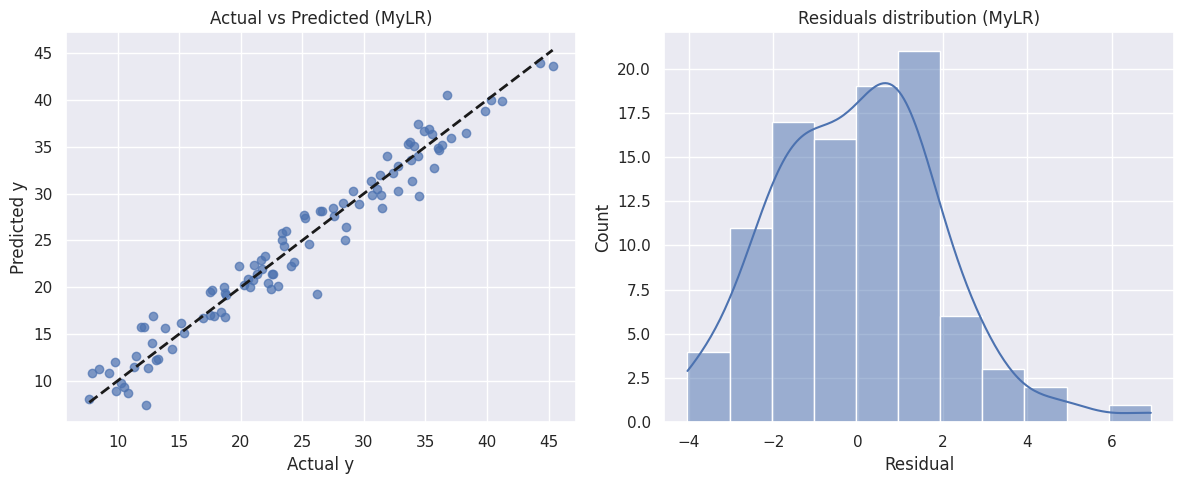

In [13]:
# Part 5: Visualization (actual vs predicted, residuals)
# -----------------------------------------------------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y, y_pred_my, label="predicted vs actual", alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual y"); plt.ylabel("Predicted y"); plt.title("Actual vs Predicted (MyLR)")
plt.subplot(1,2,2)
sns.histplot(resid_my, kde=True)
plt.title("Residuals distribution (MyLR)")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()


In [14]:
# Part 6: Student Tasks & Questions (Q1, Q2, Q3)
# -----------------------------------------------------------------------------
# Q1. Adding More Features: Add X3
X3 = np.random.rand(n,1) * 3   # new independent feature (not correlated to X1/X2)
X_3feat = np.hstack([X1, X2, X3])

# Fit new model with X1,X2,X3
model_my3 = MyLinearRegression()
model_my3.fit(X_3feat, y)
sk3 = LinearRegression(); sk3.fit(X_3feat, y.ravel())

print("\nQ1: With X3 added")
print("MyLR intercept:", model_my3.intercept_, "coefs:", model_my3.coef_)
mse3_my, r23_my = evaluate(y, model_my3.predict(X_3feat), "MyLR (3 feat)")
mse3_sk, r23_sk = evaluate(y, sk3.predict(X_3feat), "sklearn (3 feat)")



Q1: With X3 added
MyLR intercept: 4.698912590538498 coefs: [2.9314694  2.28612659 0.08384385]
MyLR (3 feat) -> MSE: 3.7771, R^2: 0.9572
sklearn (3 feat) -> MSE: 3.7771, R^2: 0.9572


In [15]:
# Q1a: Did R^2 improve?
print("\nQ1a: Did adding X3 improve R^2?")
print(f"R2 (2-feat) = {r2_score(y, y_pred_my):.4f}, R2 (3-feat) = {r23_my:.4f}")
print("Interpretation: If X3 is weakly related to y, R^2 may not change much; if X3 contains signal, R^2 increases slightly.")

# Q1b: How did coefficients of X1 and X2 change?
print("\nQ1b: Coefficient change for X1 and X2 (2-feat -> 3-feat)")
print("Coefs (2-feat):", model_my.coef_)
print("Coefs (3-feat):", model_my3.coef_)
print("Small changes are normal because adding features changes the projection space; large changes may indicate correlation/overlap in information.")



Q1a: Did adding X3 improve R^2?
R2 (2-feat) = 0.9571, R2 (3-feat) = 0.9572
Interpretation: If X3 is weakly related to y, R^2 may not change much; if X3 contains signal, R^2 increases slightly.

Q1b: Coefficient change for X1 and X2 (2-feat -> 3-feat)
Coefs (2-feat): [2.93165494 2.28772456]
Coefs (3-feat): [2.9314694  2.28612659 0.08384385]
Small changes are normal because adding features changes the projection space; large changes may indicate correlation/overlap in information.


In [16]:
# Q2. Multicollinearity: Introduce X4 = 2*X1 + noise
X4 = 2 * X1 + (np.random.randn(n,1) * 0.01)  # highly collinear with X1
X_with_X4 = np.hstack([X1, X2, X4])

model_mc = MyLinearRegression()
model_mc.fit(X_with_X4, y)
sk_mc = LinearRegression(); sk_mc.fit(X_with_X4, y.ravel())

print("\nQ2: With X4 (multicollinearity introduced)")
print("MyLR intercept:", model_mc.intercept_, "coefs:", model_mc.coef_)
mse_mc, r2_mc = evaluate(y, model_mc.predict(X_with_X4), "MyLR (X1,X2,X4)")



Q2: With X4 (multicollinearity introduced)
MyLR intercept: 4.8127296430005515 coefs: [ 93.66548509   2.29338928 -45.36520952]
MyLR (X1,X2,X4) -> MSE: 3.5882, R^2: 0.9593


In [17]:
# Q2a/b/c: check instability and explanation printed below.
print("\nQ2a: Instability check - compare coefficients to 2-feature model:")
print("Coefs (2-feat):", model_my.coef_)
print("Coefs (with X4):", model_mc.coef_)
print("You will likely see coefficient signs/values change for X1/X4 due to redundancy.")

# Detect multicollinearity with VIF
def compute_vif(X_array, feature_names=None):
    X_df = pd.DataFrame(X_array, columns=feature_names)
    vif_data = []
    for i in range(X_df.shape[1]):
        vif = variance_inflation_factor(X_df.values, i)
        vif_data.append(vif)
    return pd.DataFrame({"feature": X_df.columns, "VIF": vif_data})

vif_3 = compute_vif(X_with_X4, feature_names=["X1","X2","X4"])
print("\nVariance Inflation Factors (VIF) for [X1,X2,X4]:")
display(vif_3)

print("Q2c: To reduce multicollinearity: drop one of the collinear features, use PCA, or apply regularization (Ridge).")



Q2a: Instability check - compare coefficients to 2-feature model:
Coefs (2-feat): [2.93165494 2.28772456]
Coefs (with X4): [ 93.66548509   2.29338928 -45.36520952]
You will likely see coefficient signs/values change for X1/X4 due to redundancy.

Variance Inflation Factors (VIF) for [X1,X2,X4]:


,feature,VIF
0,X1,1.306896e+06
1,X2,2.083552e+00
2,X4,1.306940e+06


Q2c: To reduce multicollinearity: drop one of the collinear features, use PCA, or apply regularization (Ridge).


In [18]:
# Q3. Feature Scaling
X5 = np.random.rand(n,1) * 1000   # large-scale feature
X_with_X5 = np.hstack([X1, X2, X5])

model_X5 = MyLinearRegression()
model_X5.fit(X_with_X5, y)
print("\nQ3: Adding X5 (large-scale feature)")
print("Coefs (before scaling):", model_X5.coef_)

# Scale features and refit
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_with_X5)
model_X5_scaled = MyLinearRegression()
model_X5_scaled.fit(X_scaled, y)

print("Coefs (after StandardScaler):", model_X5_scaled.coef_)
print("Intercept (after scaling):", model_X5_scaled.intercept_)

print("\nQ3a: Comparison note - coefficients change scale when features are scaled. Interpretation in original units needs inverse transform.")
print("Q3b: Scaling is important for gradient descent because it helps gradient steps be balanced across features and speeds convergence.")



Q3: Adding X5 (large-scale feature)
Coefs (before scaling): [2.93223654e+00 2.28900658e+00 3.23852032e-04]
Coefs (after StandardScaler): [8.67936817 3.33785245 0.08778263]
Intercept (after scaling): 24.29980635240401

Q3a: Comparison note - coefficients change scale when features are scaled. Interpretation in original units needs inverse transform.
Q3b: Scaling is important for gradient descent because it helps gradient steps be balanced across features and speeds convergence.


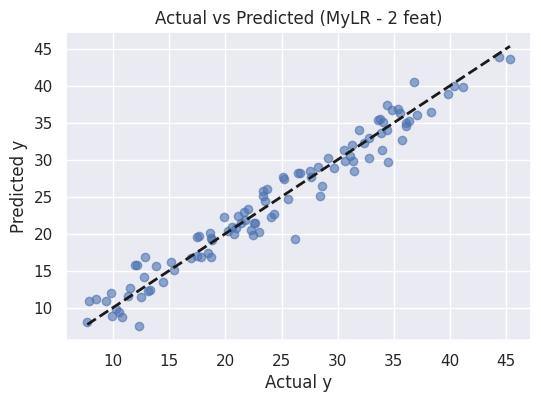

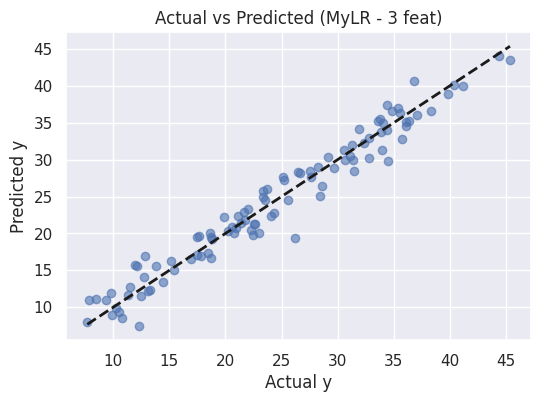

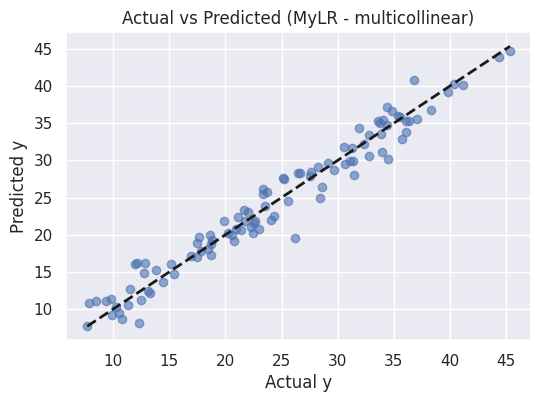

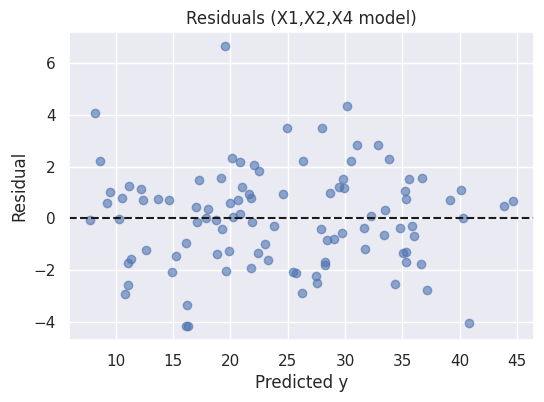

In [19]:
def plot_actual_vs_pred(y_true, y_pred, title):
    plt.figure(figsize=(6,4))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel("Actual y"); plt.ylabel("Predicted y"); plt.title(title)
    plt.show()

plot_actual_vs_pred(y, y_pred_my, "Actual vs Predicted (MyLR - 2 feat)")
plot_actual_vs_pred(y, model_my3.predict(X_3feat), "Actual vs Predicted (MyLR - 3 feat)")
plot_actual_vs_pred(y, model_mc.predict(X_with_X4), "Actual vs Predicted (MyLR - multicollinear)")

# Residual scatter for multicollinearity model
plt.figure(figsize=(6,4))
plt.scatter(model_mc.predict(X_with_X4), (y.ravel() - model_mc.predict(X_with_X4)), alpha=0.6)
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("Predicted y"); plt.ylabel("Residual"); plt.title("Residuals (X1,X2,X4 model)")
plt.show()


In [20]:
print("\n--- SUMMARY ---")
print("MyLinearRegression (2 features): intercept =", model_my.intercept_, "coefs =", model_my.coef_)
print("MyLinearRegression (3 features): intercept =", model_my3.intercept_, "coefs =", model_my3.coef_)
print("MyLinearRegression (X1,X2,X4): intercept =", model_mc.intercept_, "coefs =", model_mc.coef_)
print("MyLinearRegression (with large X5) coefs (before scaling):", model_X5.coef_)
print("MyLinearRegression (scaled features) coefs:", model_X5_scaled.coef_)

# End of lab
print("\nLab complete. Check above printed outputs and plots for the answers to Q1-Q3.")


--- SUMMARY ---
MyLinearRegression (2 features): intercept = 4.821220072900146 coefs = [2.93165494 2.28772456]
MyLinearRegression (3 features): intercept = 4.698912590538498 coefs = [2.9314694  2.28612659 0.08384385]
MyLinearRegression (X1,X2,X4): intercept = 4.8127296430005515 coefs = [ 93.66548509   2.29338928 -45.36520952]
MyLinearRegression (with large X5) coefs (before scaling): [2.93223654e+00 2.28900658e+00 3.23852032e-04]
MyLinearRegression (scaled features) coefs: [8.67936817 3.33785245 0.08778263]

Lab complete. Check above printed outputs and plots for the answers to Q1-Q3.
